<a href="https://colab.research.google.com/github/Rachmatuz/Aritmatika-operasi/blob/main/KecerdasanBuatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
   import numpy as np
   import pandas as pd

   from sklearn.preprocessing import LabelEncoder, OneHotEncoder
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler
   from sklearn.naive_bayes import GaussianNB
   from sklearn.metrics import confusion_matrix
   from sklearn.metrics import classification_report
   from sklearn.metrics import accuracy_score

In [65]:
dataset=pd.read_csv('marvel.csv', encoding='latin-1')
dataset.head()

,Character,Real Name,Affiliation,Powers,Role,Power Level
0,iron man,Tony Stark,Avengers,"Powered Armor, Genius-level intellect",Hero,Low
1,captain america,Steve Rogers,Avengers,"Super Soldier, Enhanced strength",Hero,Low
2,thor,Thor Odinson,Avengers,"God of Thunder, Weather manipulation",Hero,Low
3,black widow,Natasha Romanoff,Avengers,"Superhuman strength, Espionage",Hero,Low
4,hulk,Bruce Banner,Avengers,"Superhuman strength, Gamma Radiation",Hero,Low


<ipython-input-66-4094261e5f32>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dataset, x='Role', y='Powers', inner='stick', palette='Dark2')


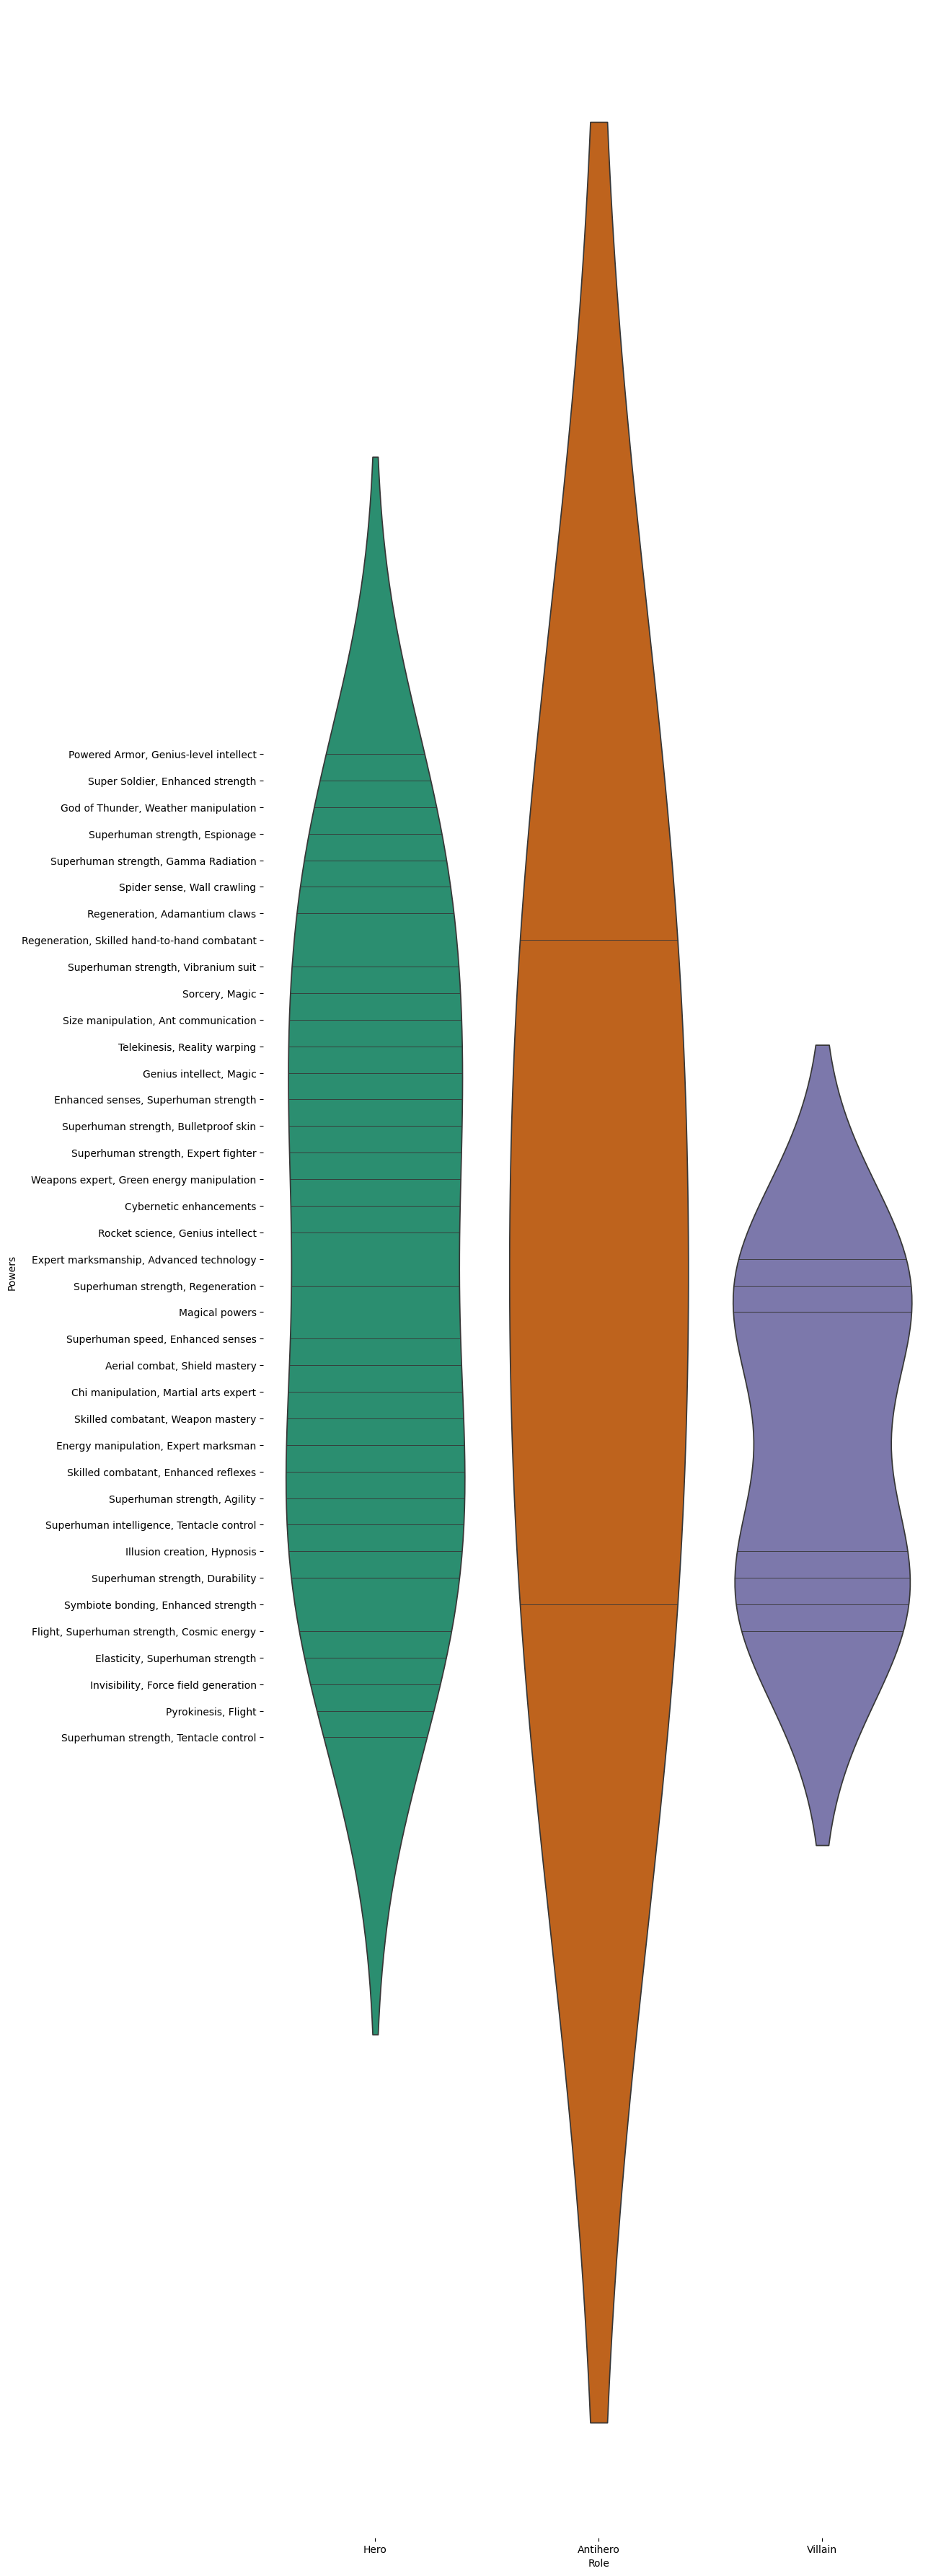

In [66]:
# @title name vs Flag

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['Powers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='Role', y='Powers', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [68]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Character    45 non-null     object
 1   Real Name    45 non-null     object
 2   Affiliation  45 non-null     object
 3   Powers       45 non-null     object
 4   Role         45 non-null     object
 5   Power Level  45 non-null     object
dtypes: object(6)
memory usage: 2.2+ KB


In [70]:
dataset.empty

False

In [71]:
from sklearn.preprocessing import LabelEncoder# Assuming LabelEncoder was intended
en = LabelEncoder()

dataset['Powers'] = en.fit_transform(dataset['Powers']) # Remove extra space(s)/tab(s) before this line
dataset.head()

,Character,Real Name,Affiliation,Powers,Role,Power Level
0,iron man,Tony Stark,Avengers,13,Hero,Low
1,captain america,Steve Rogers,Avengers,23,Hero,Low
2,thor,Thor Odinson,Avengers,9,Hero,Low
3,black widow,Natasha Romanoff,Avengers,29,Hero,Low
4,hulk,Bruce Banner,Avengers,31,Hero,Low


In [72]:

# Create a OneHotEncoder for the 'Role' column
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array
encoded_data = onehot_encoder.fit_transform(dataset[['Role']])


In [73]:
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['Role']))


In [74]:
dataset = pd.concat([dataset, encoded_df], axis=1)

In [75]:
dataset = dataset.drop('Role', axis=1)

In [77]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [78]:
  x

array([['iron man', 'Tony Stark', 'Avengers', 13, 'Low', 0.0, 1.0],
       ['captain america', 'Steve Rogers', 'Avengers', 23, 'Low', 0.0,
        1.0],
       ['thor', 'Thor Odinson', 'Avengers', 9, 'Low', 0.0, 1.0],
       ['black widow', 'Natasha Romanoff', 'Avengers', 29, 'Low', 0.0,
        1.0],
       ['hulk', 'Bruce Banner', 'Avengers', 31, 'Low', 0.0, 1.0],
       ['spider-man', 'Peter Parker', 'Avengers', 22, 'Low', 0.0, 1.0],
       ['wolverine', 'James Howlett', 'X-Men', 15, 'Low', 0.0, 1.0],
       ['deadpool', 'Wade Wilson', 'X-Force', 16, 'Low', 1.0, 0.0],
       ['black panther', 'Tâ\x80\x99Challa', 'Avengers', 34, 'Low', 0.0,
        1.0],
       ['doctor strange', 'Stephen Strange', 'Avengers', 21, 'Low', 0.0,
        1.0],
       ['ant-man', 'Scott Lang', 'Avengers', 18, 'Low', 0.0, 1.0],
       ['scarlet witch', 'Wanda Maximoff', 'Avengers', 36, 'Low', 0.0,
        1.0],
       ['vision', 'Victor Von Doom', 'Avengers', 8, 'Low', 0.0, 1.0],
       ['daredevil', 'Matt

In [79]:
  y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print("x_train=", len(x_train))
print("x_test=", len(x_test))
print("y_train=", len(y_train))
print("y_test=", len(y_test))


x_train= 36
x_test= 9
y_train= 36
y_test= 9


In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.naive_bayes import GaussianNB # Import the correct class from sklearn

classifier = GaussianNB() # Corrected the typo in the class name
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: 'captain america'

In [82]:
  x_train

array([['captain america', 'Steve Rogers', 'Avengers', 23, 'Low', 0.0,
        1.0],
       ['wolverine', 'James Howlett', 'X-Men', 15, 'Low', 0.0, 1.0],
       ['invisible woman', 'Ben Grimm', 'Fantastic Four', 11, 'Low', 0.0,
        1.0],
       ['vision', 'Victor Von Doom', 'Avengers', 8, 'Low', 0.0, 1.0],
       ['mysterio', 'Eddie Brock', 'Sinister Six', 10, 'Low', 0.0, 0.0],
       ['hela', 'Sue Storm', 'Avengers', 12, 'Low', 0.0, 0.0],
       ['black bolt', 'Blackagar Boltagon', 'Avengers', 10, 'Low', 0.0,
        1.0],
       ['shang-chi', 'Shang-Chi', 'Avengers', 20, 'Low', 0.0, 1.0],
       ['gamora', 'Gamora Zenwhoberi', 'Guardians of the Galaxy', 30,
        'Low', 0.0, 1.0],
       ['green goblin', 'Norman Osborn', 'Villain', 12, 'Low', 0.0, 0.0],
       ['deadpool', 'Wade Wilson', 'X-Force', 16, 'Low', 1.0, 0.0],
       ['doctor doom', 'Victor Von Doom', 'Villain', 32, 'Low', 0.0, 0.0],
       ['captain marvel', 'Carol Danvers', 'Avengers', 7, 'Low', 0.0,
        1.0],
 

In [83]:
  x_test

array([['black panther', 'Tâ\x80\x99Challa', 'Avengers', 34, 'Low', 0.0,
        1.0],
       ['scarlet witch', 'Wanda Maximoff', 'Avengers', 36, 'Low', 0.0,
        1.0],
       ['moon knight', 'Marc Spector', 'Avengers', 4, 'Low', 0.0, 1.0],
       ['valkyrie', 'Brunnhilde', 'Defenders', 24, 'Low', 0.0, 1.0],
       ['black widow', 'Natasha Romanoff', 'Avengers', 17, 'Low', 0.0,
        1.0],
       ['daredevil', 'Matt Murdock', 'Defenders', 5, 'Low', 0.0, 1.0],
       ['bucky barnes', 'James Buchanan Barnes', 'Avengers', 32, 'Low',
        0.0, 1.0],
       ['ant-man', 'Scott Lang', 'Avengers', 18, 'Low', 0.0, 1.0],
       ['spider-man', 'Peter Parker', 'Avengers', 22, 'Low', 0.0, 1.0]],
      dtype=object)

In [84]:
  y_train

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0.])

In [85]:
  y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
from sklearn.naive_bayes import GaussianNB # Import the correct class from sklearn

classifier = GaussianNB() # Corrected the typo in the class name
classifier.fit(x_train, y_train)

ValueError: could not convert string to float: 'captain america'

In [87]:
y_pred = classifier.predict(x_test)
y_pred # Removed the extra indent before y_pred

ValueError: could not convert string to float: 'black panther'

In [ ]:
  classifier.predict_proba(x_test)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.17255335e-11, 0.00000000e+00],
       [9.99975895e-01, 2.41049505e-05, 0.00000000e+00],
       [1.00000000e+00, 3.17255335e-11, 0.00000000e+00],
       [9.99999998e-01, 2.13795783e-09, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99999998e-01, 2.13795783e-09, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99975895e-01, 2.41049505e-05, 0.00000000e+00],
       [9.99999792e-01, 2.07969184e-07, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.15731305e-18, 2.79496957e-24, 1.00000000e+00],
       [1.00000000e+00, 3.17255335e-11, 0.00000000e+00],
       [9.99975895e-01, 2.41049

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm) # Removed the extra indent before print(cm)

[[10  0  1]
 [ 0  9  0]
 [ 0  0  0]]


In [ ]:
akurasi = classification_report(y_test,y_pred)
print(akurasi) # Removed the extra indent and aligned with the previous line

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         9
           2       0.00      0.00      0.00         0

    accuracy                           0.95        20
   macro avg       0.67      0.64      0.65        20
weighted avg       1.00      0.95      0.97        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 95 persen


In [ ]:
import pandas as pd # Added import statement for pandas

ydata = pd.DataFrame() # Corrected typo: Dataframe to DataFrame
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y-pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y-pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


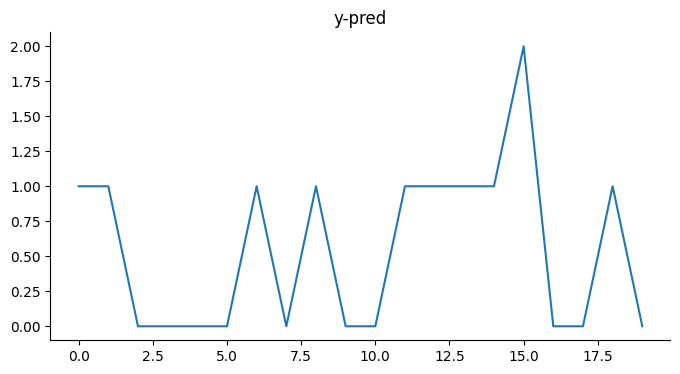

In [ ]:
# @title y-pred

from matplotlib import pyplot as plt
ydata['y-pred'].plot(kind='line', figsize=(8, 4), title='y-pred')
plt.gca().spines[['top', 'right']].set_visible(False)

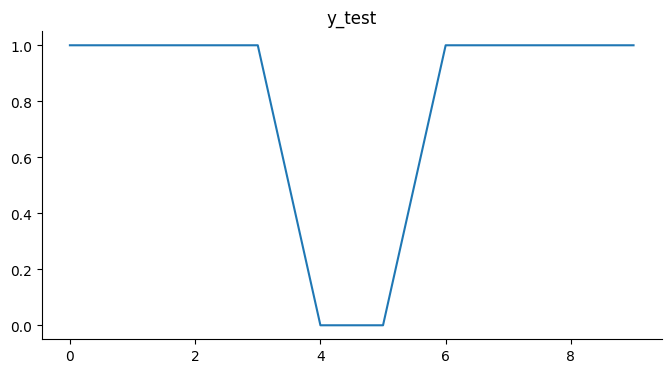

In [ ]:
# @title y_test

from matplotlib import pyplot as plt
ydata['y_test'].plot(kind='line', figsize=(8, 4), title='y_test')
plt.gca().spines[['top', 'right']].set_visible(False)

In [60]:
ydata.to_excel('marvel.csv', index=False)

NameError: name 'ydata' is not defined